# HM5- Text Mining
## Time: 11/09/2019
## Author: Kelly, Ray, David, De, Lily

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # for plot styling
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


martin = pd.read_csv("/Users/RayLiu/Desktop/2019/NU/2019-fall/IMC 466/HW/HM5/martin.txt", sep='|')
pd.set_option('display.max_columns', None)

# martin.to_csv('martin.csv',index=False)

martin.dropna(inplace=True) # Drop missing value
martin.reset_index(drop=True, inplace=True)
martin.fillna(0)
martin.tail(5)

,product_id,page_id,exposures,purchases,Nhelp,Nnothelp,verified,price,valence,category_name_complete,brand_name,review_comments
1706,34324869,459043,77,4,0,0,0,9.597143,2,cold & hot packs:,Walgreens,I bought this to alleviate migraine pain. It r...
1707,34325045,518143,66,4,0,0,0,5.443763,5,NonRx:beauty:skin care:cleansers:face cloths:,Clean & Clear,I used to use the Basics product when it came...
1708,34358865,523224,140,12,0,0,0,19.295652,5,NonRx:beauty:hair care:salon hair care:salon s...,Redken,I have used Pureology for years. It is more ex...
1709,34369393,521836,75,5,0,0,1,6.735882,5,NonRx:personal care:massage & relaxation:aroma...,NOW Essential Oils,I use this as a natural perfume. One of my fav...
1710,34371841,528774,98,3,0,0,1,27.533333,5,NonRx:beauty:skin care:lotions:creams:,Avene,After recovering from laser surgery I started ...


## Question 1:
### 1. Add p, logodds, and help percentage

In [2]:
from sklearn.model_selection import KFold

martin['p'] = 0.01 + 0.98*(martin.purchases / martin.exposures)
martin['logodds'] = np.log(martin.p/(1-martin.p))
martin['helppercentage'] = martin.Nhelp + 1 / (martin.Nhelp+martin.Nnothelp+2)
martin.dtypes
martin.shape
martin.head(5)

,product_id,page_id,exposures,purchases,Nhelp,Nnothelp,verified,price,valence,category_name_complete,brand_name,review_comments,p,logodds,helppercentage
0,1075028,15097,75,1,7,0,0,2.990000,5,NonRx:medicine & health:digestion & nausea:chi...,Fleet,"Very easy to hold in and apply with one hand, ...",0.023067,-3.746030,7.111111
1,1080685,55546,164,12,22,1,0,6.670000,5,"NonRx:medicine & health:condoms, fertility & p...",Sheer Glyde,These have been a wonderful addition to our re...,0.081707,-2.419373,22.040000
2,1103700,157490,321,1,0,0,0,5.783103,4,"NonRx:household, food & pets:outdoor & garden:...",Raid,Excellent Product! Almost Instant Killing Wasp...,0.013053,-4.325601,0.500000
3,1122533,44628,86,14,2,1,0,3.833540,2,NonRx:personal care:feminine care:maxi pads:,Kotex,"I really don't like these. I slept in one, and...",0.169535,-1.588927,2.200000
4,1124778,86897,96,10,5,0,0,3.790086,5,NonRx:medicine & health:home health care:daily...,Comfort Personal Cleansing,"Wonderful, convenient product. The cloths are ...",0.112083,-2.069635,5.142857


In [3]:
category_list = ['vitamins', 'personal_care','medicine_health', 'household', 'diet_fitness', 'beauty','baby_mom','others']
for i in range(len(category_list)):
    martin[category_list[i]] = [0 for j in range(len(martin['category_name_complete']))]

In [4]:
category_name = list(martin['category_name_complete'])
for i in range(len(category_name)):
    if 'vitamins' in category_name[i]:
        martin['vitamins'][i] = 1
    elif 'personal care' in category_name[i]:
        martin['personal_care'][i] = 1
    elif 'medicine & health' in category_name[i]:
        martin['medicine_health'][i] = 1
    elif 'household, food & pets' in category_name[i]:
        martin['household'][i] = 1
    elif 'diet & fitness' in category_name[i]:
        martin['diet_fitness'][i] = 1        
    elif 'beauty' in category_name[i]:
        martin['beauty'][i] = 1
    elif 'baby & mom' in category_name[i]:
        martin['baby_mom'][i] = 1     
    else:
        martin['others'][i] = 1  

martin.head(5)

,product_id,page_id,exposures,purchases,Nhelp,Nnothelp,verified,price,valence,category_name_complete,brand_name,review_comments,p,logodds,helppercentage,vitamins,personal_care,medicine_health,household,diet_fitness,beauty,baby_mom,others
0,1075028,15097,75,1,7,0,0,2.990000,5,NonRx:medicine & health:digestion & nausea:chi...,Fleet,"Very easy to hold in and apply with one hand, ...",0.023067,-3.746030,7.111111,0,0,1,0,0,0,0,0
1,1080685,55546,164,12,22,1,0,6.670000,5,"NonRx:medicine & health:condoms, fertility & p...",Sheer Glyde,These have been a wonderful addition to our re...,0.081707,-2.419373,22.040000,0,0,1,0,0,0,0,0
2,1103700,157490,321,1,0,0,0,5.783103,4,"NonRx:household, food & pets:outdoor & garden:...",Raid,Excellent Product! Almost Instant Killing Wasp...,0.013053,-4.325601,0.500000,0,0,0,1,0,0,0,0
3,1122533,44628,86,14,2,1,0,3.833540,2,NonRx:personal care:feminine care:maxi pads:,Kotex,"I really don't like these. I slept in one, and...",0.169535,-1.588927,2.200000,0,1,0,0,0,0,0,0
4,1124778,86897,96,10,5,0,0,3.790086,5,NonRx:medicine & health:home health care:daily...,Comfort Personal Cleansing,"Wonderful, convenient product. The cloths are ...",0.112083,-2.069635,5.142857,0,0,1,0,0,0,0,0


In [5]:
martin.describe()

,product_id,page_id,exposures,purchases,Nhelp,Nnothelp,verified,price,valence,p,logodds,helppercentage,vitamins,personal_care,medicine_health,household,diet_fitness,beauty,baby_mom,others
count,1.711000e+03,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,2.295304e+07,408818.555231,123.214494,6.638808,1.247224,0.340736,0.520748,15.366365,4.172998,0.066239,-2.877425,1.603781,0.150205,0.157802,0.082992,0.049094,0.045003,0.431911,0.042081,0.040912
std,7.015155e+06,110343.893462,101.327598,6.741544,2.298795,1.078322,0.499715,18.839919,1.295695,0.044131,0.767718,2.206950,0.357376,0.364662,0.275951,0.216128,0.207371,0.495487,0.200832,0.198144
min,1.075028e+06,10552.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.901163,1.000000,0.010000,-4.595120,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.740911e+07,370192.500000,72.000000,2.000000,0.000000,0.000000,0.000000,6.118668,4.000000,0.034500,-3.331687,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.448176e+07,437213.000000,92.000000,5.000000,1.000000,0.000000,1.000000,9.723333,5.000000,0.055938,-2.825957,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.889926e+07,487623.000000,135.000000,9.000000,2.000000,0.000000,1.000000,17.688004,5.000000,0.088851,-2.327751,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.437184e+07,534225.000000,1311.000000,80.000000,34.000000,18.000000,1.000000,339.150000,5.000000,0.326615,-0.723533,34.027778,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.Data Transformation

In [6]:
new = martin[['product_id','page_id','exposures','purchases','Nhelp','Nnothelp','verified',
             'price','valence','logodds','helppercentage','p', 'vitamins', 'personal_care',
            'medicine_health', 'household', 'diet_fitness', 'beauty','baby_mom','others']]

new['logexposures'] = np.log(1 + new.exposures)
new['logpurchases'] = np.log(1 + new.purchases)
new['logNhelp'] = np.log(1 + new.Nhelp)
new['logNnothelp'] = np.log(1 + new.Nnothelp)
new['logprice'] = np.log(1 + new.price)

Y = new[['logodds']]
X = new[['logexposures','logpurchases','logNhelp','logNnothelp','verified',
             'logprice','valence','helppercentage']]

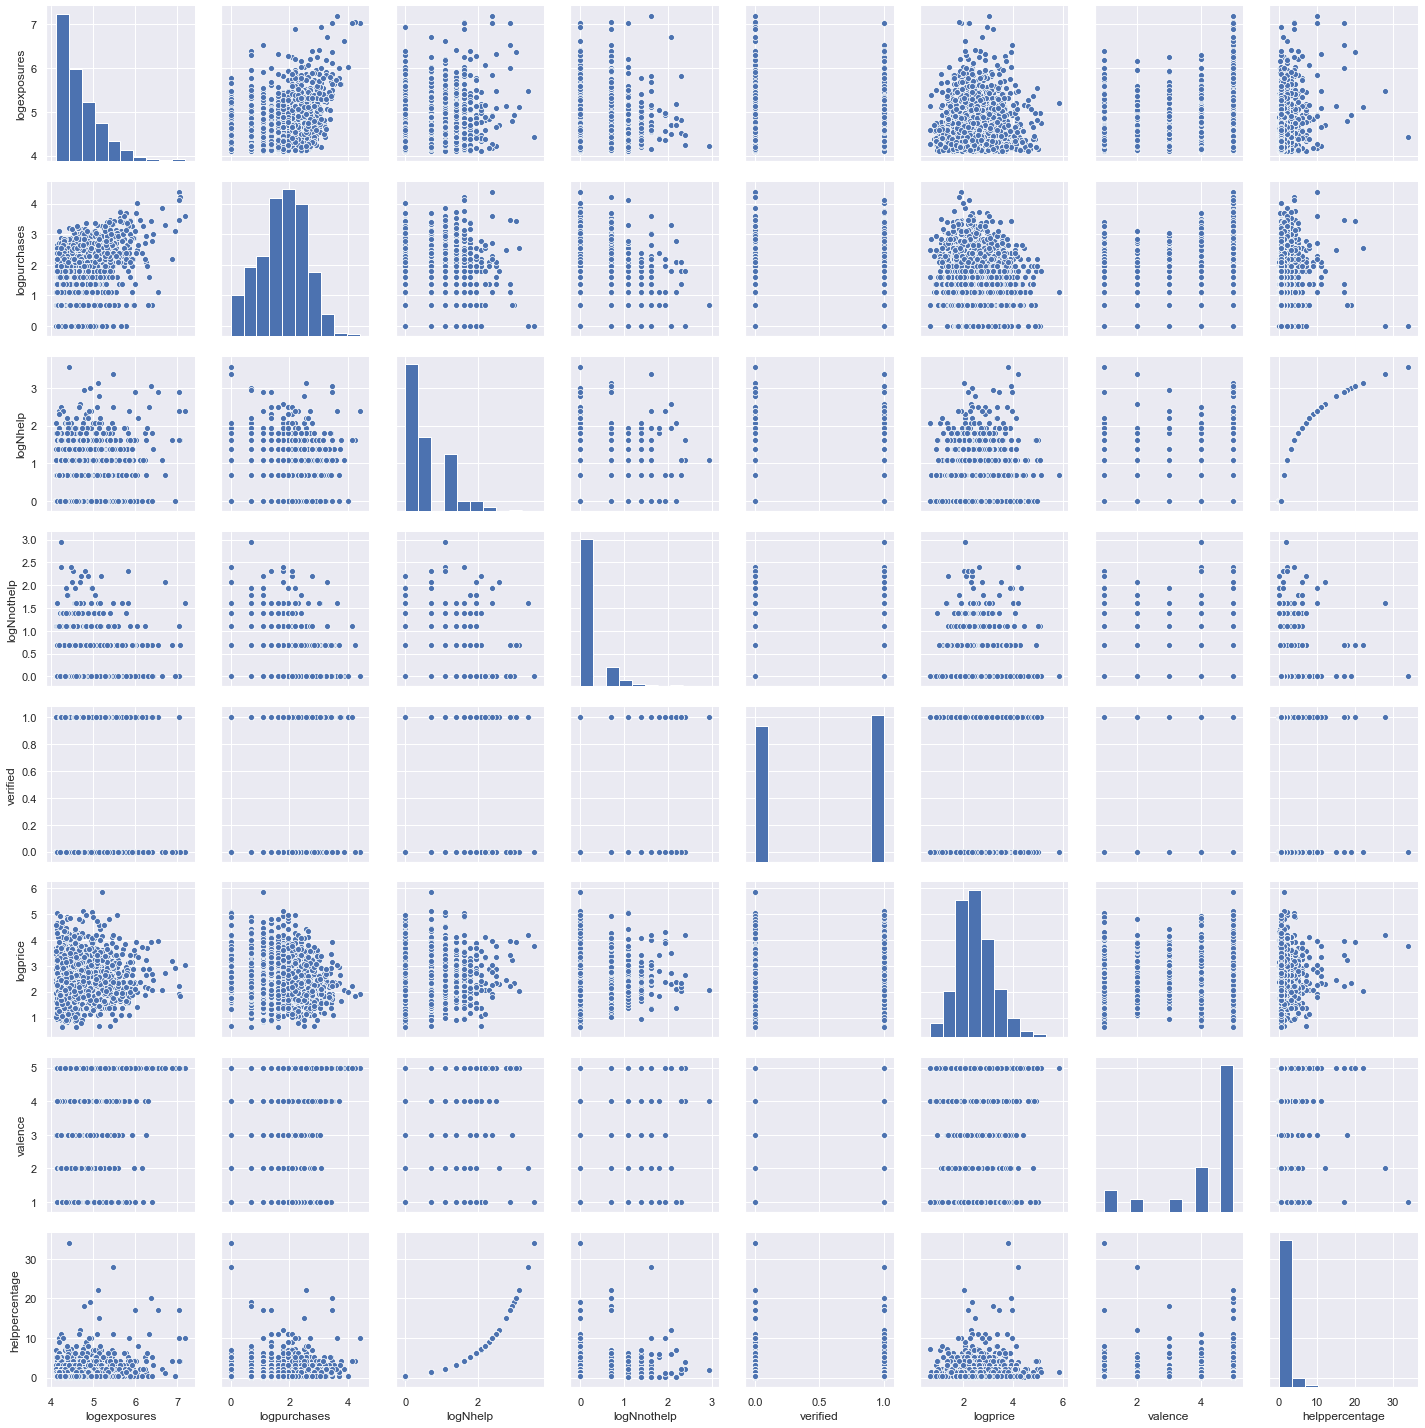

In [7]:
sns.pairplot(X)
plt.show()

## Question 2:

### 3. Predict Logodds Model with Numerical Variables excluding Exposures and Purchases

In [8]:
dropep = new[['logNhelp','logNnothelp','verified',
             'logprice','valence','helppercentage','vitamins', 'personal_care',
            'medicine_health', 'household', 'diet_fitness', 'beauty','baby_mom','others']]

#### 3.1 Try linear model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
MSE = cross_val_score(model, dropep, Y, scoring="neg_mean_squared_error", cv=10)
r2 = cross_val_score(model, dropep, Y, cv=10)
print(-np.mean(MSE))
print(np.mean(r2))

0.4874974043165192
0.1579131290113543


#### 3.2 Try Random Forest (13.3%)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=5, random_state=1108,
                              n_estimators=100)
rfMSE_dropep = cross_val_score(regr, dropep, Y, scoring="neg_mean_squared_error", cv=10)
rfr2_dropep = cross_val_score(regr, dropep, Y, cv=10)
print(-np.mean(rfMSE_dropep))
print(np.mean(rfr2_dropep))


0.4995267650751857
0.13553853117297646


In [11]:
regr.fit(dropep,Y)
print(regr.feature_importances_.round(decimals = 3))

[0.018 0.026 0.016 0.387 0.264 0.064 0.006 0.006 0.007 0.004 0.009 0.177
 0.004 0.011]


#### 3.3 Try Lightgbm

In [12]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth= 5, learning_rate=0.01, 
            n_estimators=1000, max_bin=255, subsample_for_bin=50000, objective=None,  
                     reg_alpha=0.1, reg_lambda=0, seed=1108)
lgbMSE_dropep = cross_val_score(lgbm, dropep, Y, scoring="neg_mean_squared_error", cv=10)
lgbr2_dropep = cross_val_score(lgbm, dropep, Y, cv=10)
print(-np.mean(lgbMSE_dropep))
print(np.mean(lgbr2_dropep))

0.5060415549211937
0.12478922389653721


### 4. Predict Binary Outcomes with (All Numerical Variables) and (Numerical Variables excluding Exposures and Purchases).

In [13]:
# we set 0.045455, the median of p as the threshold.
new["label"] = np.where(new["p"] > 0.045455, 1, 0)
martin["label"] = np.where(martin["p"] > 0.045455, 1, 0)
new.head(5)


,product_id,page_id,exposures,purchases,Nhelp,Nnothelp,verified,price,valence,logodds,helppercentage,p,vitamins,personal_care,medicine_health,household,diet_fitness,beauty,baby_mom,others,logexposures,logpurchases,logNhelp,logNnothelp,logprice,label
0,1075028,15097,75,1,7,0,0,2.990000,5,-3.746030,7.111111,0.023067,0,0,1,0,0,0,0,0,4.330733,0.693147,2.079442,0.000000,1.383791,0
1,1080685,55546,164,12,22,1,0,6.670000,5,-2.419373,22.040000,0.081707,0,0,1,0,0,0,0,0,5.105945,2.564949,3.135494,0.693147,2.037317,1
2,1103700,157490,321,1,0,0,0,5.783103,4,-4.325601,0.500000,0.013053,0,0,0,1,0,0,0,0,5.774552,0.693147,0.000000,0.000000,1.914435,0
3,1122533,44628,86,14,2,1,0,3.833540,2,-1.588927,2.200000,0.169535,0,1,0,0,0,0,0,0,4.465908,2.708050,1.098612,0.693147,1.575579,1
4,1124778,86897,96,10,5,0,0,3.790086,5,-2.069635,5.142857,0.112083,0,0,1,0,0,0,0,0,4.574711,2.397895,1.791759,0.000000,1.566548,1


#### 4.1 Try LR

In [14]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000, solver="lbfgs")
ylabel = new[['label']]
model = LogisticRegression()

MSElrdropep = cross_val_score(LR, dropep, ylabel, scoring="neg_mean_squared_error", cv=10)
r2lrdropep = cross_val_score(LR, dropep, ylabel, cv=10)
print(-np.mean(MSElrdropep))
print(np.mean(r2lrdropep))

0.3296912824697403
0.6703087175302598


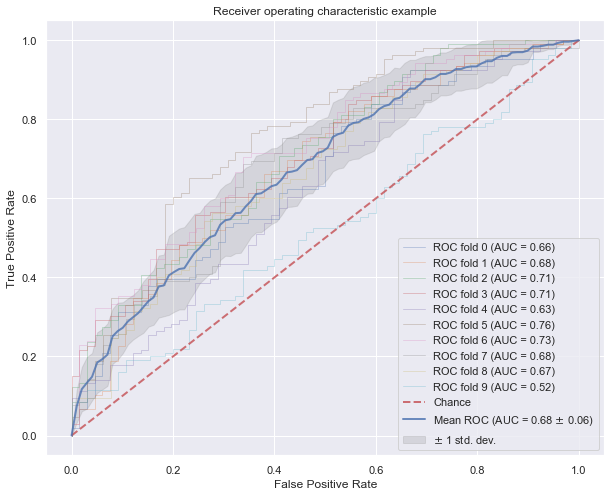

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
from matplotlib.pyplot import figure

cv = StratifiedKFold(n_splits=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


i = 0
for train, test in cv.split(dropep, ylabel):
    probas_ = LR.fit(dropep.iloc[train], ylabel.iloc[train]).predict_proba(
        dropep.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(ylabel.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

fig = plt.gcf()
fig.set_size_inches(10,8, forward = False)

plt.show()

### 4.2 Try RF

#### 4.2.1 RF without exposures and purchases:

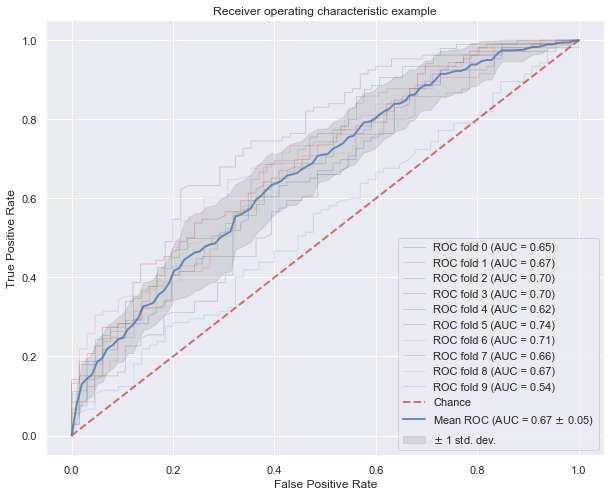

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

RFCL = RandomForestClassifier(max_depth=5, random_state=1108,
                              n_estimators=100)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


i = 0
for train, test in cv.split(dropep, ylabel):
    probas_ = RFCL.fit(dropep.iloc[train], ylabel.iloc[train]).predict_proba(
        dropep.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(ylabel.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
fig = plt.gcf()
fig.set_size_inches(10,8, forward = False)
plt.show()

##   Question 3:
### 5.1 Bag of Words Prediction
#### 5.1.1 Linear Regression for logodds (no stem)

In [17]:
reviews = martin['review_comments']
reviews.head()

0    Very easy to hold in and apply with one hand, ...
1    These have been a wonderful addition to our re...
2    Excellent Product! Almost Instant Killing Wasp...
3    I really don't like these. I slept in one, and...
4    Wonderful, convenient product. The cloths are ...
Name: review_comments, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10, lowercase= True, ngram_range=(1,2)).fit(reviews) 
# Only keep the words that at least appears 10 times
# Include bigram
vect.get_feature_names()

len(vect.get_feature_names())   # 1732 features!



1732

In [19]:
vectorized = vect.transform(reviews)
vectorized_array = pd.DataFrame(vectorized.toarray())

In [20]:
# 6K variables leads to overfitting. So Do PCA:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
principalComponents = pca.fit_transform(vectorized_array)
principalDf = pd.DataFrame(data = principalComponents)

In [21]:
model = LinearRegression()
r2 = cross_val_score(model, principalDf, martin['logodds'], cv=10)
print("Regression of Logodds:")
print("r2: " + str(np.mean(r2)))

Regression of Logodds:
r2: 0.030803089125997718


In [22]:
r2

array([ 0.06292155,  0.05078829, -0.05476923,  0.11061767,  0.00780455,
        0.04349346,  0.12732992, -0.01705065,  0.00569619, -0.02880084])

In [23]:
# Try Lasso
from sklearn import linear_model

model = linear_model.Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r2 = cross_val_score(model, vectorized_array, martin['logodds'], cv=10)
print("Regression of Logodds - Lasso:")
print("r2: " + str(np.mean(r2)))

Regression of Logodds - Lasso:
r2: 0.042937577009077875


#### 5.1.2 Linear for stemmed

In [24]:
# Stemming
from sklearn.metrics import r2_score
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


doc = martin[['logodds','review_comments']]
processed_docs = martin['review_comments'].map(preprocess)
processed_docs
type(processed_docs)

df = pd.DataFrame({'tokens': processed_docs.values})
df['tokens'] = [' '.join(map(str, l)) for l in df['tokens']]
df.head()



[nltk_data] Downloading package wordnet to /Users/RayLiu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tokens
0,easi hold appli hand deal appreci need
1,wonder addit relationship reason desir barrier...
2,excel product instant kill wasp nest aluminum ...
3,like sleep protect long wake bunch panti leak ...
4,wonder conveni product cloth soft clean deodor...


In [25]:
vectorized_stem = vect.transform(df['tokens'])
vectorized_stem_array = pd.DataFrame(vectorized_stem.toarray())

In [26]:
model = linear_model.Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r2 = cross_val_score(model,vectorized_stem_array, Y, cv=10)
print("Regression of Logodds - PCA:")
print("r2: " + str(np.mean(r2)))

Regression of Logodds - PCA:
r2: 0.032769952032736374


#### 5.1.3 Logistic for no stemmed

In [27]:
new['Likely_Purchase'] = np.where(martin['p']>0.045455, 1, 0) # P > 0.045455 pos, OW neg

In [28]:
model = LogisticRegression()
r2 = cross_val_score(model, vectorized, new['Likely_Purchase'], cv=10)
AUC = cross_val_score(model, vectorized, new['Likely_Purchase'],scoring = "roc_auc", cv=10)
print("Regression of Likely_Purchase:")
print("r2: " + str(np.mean(r2)))
print("auc: " + str(np.mean(AUC)))

Regression of Likely_Purchase:
r2: 0.5820636234910121
auc: 0.5664478163346087


In [29]:
# try PCA, looks better.
pca = PCA(n_components=60)
principalComponents = pca.fit_transform(vectorized_array)
principalDf = pd.DataFrame(data = principalComponents)

from sklearn.svm import l1_min_c

model = linear_model.LogisticRegression(penalty='l1', solver='saga',
                                      tol=1e-4, max_iter=int(1e4),
                                      warm_start=True)

r2 = cross_val_score(model, principalDf, new['Likely_Purchase'], cv=10)
AUC = cross_val_score(model, principalDf, new['Likely_Purchase'],scoring = "roc_auc", cv=10)
print("Regression of Likely_Purchase - PCA:")
print("r2: " + str(np.mean(r2)))
print("auc: " + str(np.mean(AUC)))

Regression of Likely_Purchase - PCA:
r2: 0.6218550651594787
auc: 0.5899487933450198


#### 5.1.4 Logistic for stemmed

In [30]:
pca = PCA(n_components=60)
principalComponents_stem = pca.fit_transform(vectorized_stem_array)
principalDf_stem = pd.DataFrame(data = principalComponents_stem)

model = LogisticRegression()
Svectorized = vectorized_stem_array
r2 = cross_val_score(model, principalDf_stem, new['Likely_Purchase'], cv=10)
AUC = cross_val_score(model, principalDf_stem, new['Likely_Purchase'],scoring = "roc_auc", cv=10)
print("Regression of Likely_Purchase:")
print("r2: " + str(np.mean(r2)))
print("Auc: " + str(np.mean(AUC)))

Regression of Likely_Purchase:
r2: 0.615422076623387
Auc: 0.5869741610590667


#### 5.1.5 RF-binary stemmed

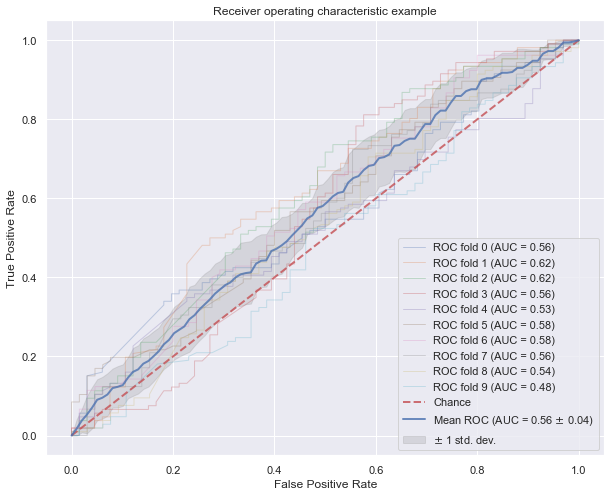

In [31]:
RFCL = RandomForestClassifier(max_depth=5, random_state=1108,
                              n_estimators=100)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


i = 0
for train, test in cv.split(df['tokens'], martin['label']):
    X_train, X_test = df['tokens'].iloc[train], df['tokens'].iloc[test]
    y_train, y_test = martin['label'].iloc[train], martin['label'].iloc[test]
    
    vect = CountVectorizer().fit(X_train)
    X_train_vectorized = vect.transform(X_train)    
    probas_ = RFCL.fit(X_train_vectorized, y_train).predict_proba(
        vect.transform(X_test))
    
# Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

fig = plt.gcf()
fig.set_size_inches(10,8, forward = False)
plt.show()

### 5.2 TF-IDF
#### 5.2.1 Linear for no stem


In [32]:
# IF-IDF + PCA

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=10).fit(reviews)
X_TF_IDF = vect.transform(reviews)
X_TF_IDF_array = pd.DataFrame(X_TF_IDF.toarray())

pca = PCA(n_components=60)
principalComponents = pca.fit_transform(X_TF_IDF_array)
PCA_X_TF_IDF_array = pd.DataFrame(data = principalComponents)

model = LinearRegression()
MSE = cross_val_score(model, PCA_X_TF_IDF_array, martin['logodds'], scoring="neg_mean_squared_error", cv=10)
r2 = cross_val_score(model, PCA_X_TF_IDF_array, martin['logodds'], cv=10)
print("Regression of Logodds:")
print("MSE: " + str(-np.mean(MSE)))
print("r2: " + str(np.mean(r2)))

Regression of Logodds:
MSE: 0.5441311514523911
r2: 0.06339728134035204


#### 5.2.2 Linear for  (stemmed)

In [33]:
vect = TfidfVectorizer(min_df=10).fit(df['tokens'])
S_X_TF_IDF = vect.transform(df['tokens'])
S_X_TF_IDF_array = pd.DataFrame(X_TF_IDF.toarray())

pca = PCA(n_components=60)
principalComponents = pca.fit_transform(S_X_TF_IDF_array)
PCA_S_X_TF_IDF_array = pd.DataFrame(data = principalComponents)

model = LinearRegression()
MSE = cross_val_score(model, PCA_S_X_TF_IDF_array, martin['logodds'], scoring="neg_mean_squared_error", cv=10)
r2 = cross_val_score(model, PCA_S_X_TF_IDF_array, martin['logodds'], cv=10)
print("Regression of Logodds:")
print("MSE: " + str(-np.mean(MSE)))
print("r2: " + str(np.mean(r2)))

Regression of Logodds:
MSE: 0.546987411781631
r2: 0.05907714355730168


#### 5.2.3 Logistic for  (no stem)

In [34]:
model = LogisticRegression()
AUC  = cross_val_score(model, PCA_X_TF_IDF_array, new['Likely_Purchase'], scoring="roc_auc", cv=10)
r2 = cross_val_score(model, PCA_X_TF_IDF_array, new['Likely_Purchase'], cv=10)
print("Regression of Likely_Purchase:")
print("AUC: " + str(np.mean(AUC)))
print("r2: " + str(np.mean(r2)))
# TF-IDF better than bag of words.

Regression of Likely_Purchase:
AUC: 0.6178176163459181
r2: 0.6300422396620828


#### 5.2.4 Logistic for binary (stemmed)

In [35]:
Svectorized = vect.transform(df['tokens'])

model = LogisticRegression()
r2 = cross_val_score(model, PCA_S_X_TF_IDF_array, new['Likely_Purchase'], cv=10)
AUC = cross_val_score(model, PCA_S_X_TF_IDF_array, new['Likely_Purchase'],scoring = "roc_auc", cv=10)
print("Regression of Likely_Purchase:")
print("r2: " + str(np.mean(r2)))
print("AUC: " + str(np.mean(AUC)))

Regression of Likely_Purchase:
r2: 0.6312049903600773
AUC: 0.6117038558925352


#### 5.2.5 RF-binary stemmed

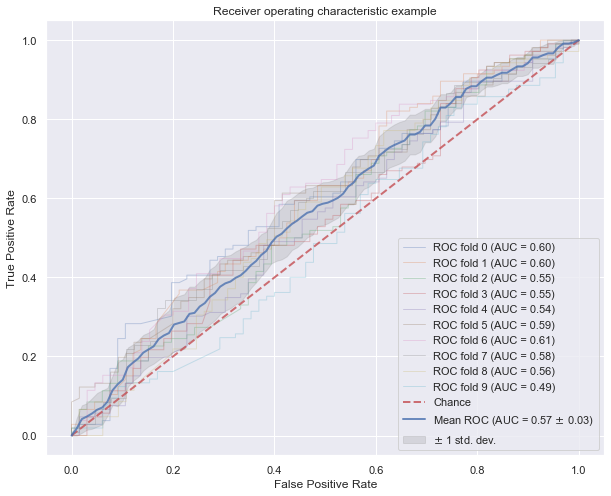

In [36]:

RFCL = RandomForestClassifier(max_depth=5, random_state=1108,
                              n_estimators=100)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


i = 0
for train, test in cv.split(df['tokens'], martin['label']):
    X_train, X_test = df['tokens'].iloc[train], df['tokens'].iloc[test]
    y_train, y_test = martin['label'].iloc[train], martin['label'].iloc[test]
    
    vect = TfidfVectorizer(min_df=5).fit(X_train)
    X_train_vectorized = vect.transform(X_train)    
    probas_ = RFCL.fit(X_train_vectorized, y_train).predict_proba(
        vect.transform(X_test))
    
# Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

fig = plt.gcf()
fig.set_size_inches(10,8, forward = False)
plt.show()

# roughly the same AUC with far fewer features!

## Question 4:
### 6. All variables

### 6.1 No stemmed Liner, Logistic, Random Forest

In [37]:
# PCA
vectorized = vect.transform(reviews)
vectorized_array = pd.DataFrame(vectorized.toarray()) # need to convert to np array.
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(vectorized_array)
principalDf = pd.DataFrame(data = principalComponents)


X_all = np.concatenate((dropep, principalDf), axis=1)

model = LinearRegression()
MSE = cross_val_score(model, X_all , Y, scoring="neg_mean_squared_error", cv=10)
r2 = cross_val_score(model, X_all, Y, cv=10)
print("Regression of Logodds:")
print("MSE: " + str(-np.mean(MSE)))
print("r2: " + str(np.mean(r2)))

model = LogisticRegression()
AUC = cross_val_score(model, X_all, new['Likely_Purchase'], scoring="roc_auc", cv=10)
r2 = cross_val_score(model, X_all, new['Likely_Purchase'], cv=10)
print("Regression of Likely_Purchase:")
print("MSE: " + str(np.mean(AUC)))
print("r2: " + str(np.mean(r2)))

Regression of Logodds:
MSE: 0.48074846284571054
r2: 0.1693181421153499
Regression of Likely_Purchase:
MSE: 0.6827022285890212
r2: 0.6603225574195407


In [38]:
regr = RandomForestRegressor(max_depth=5, random_state=1108,
                              n_estimators=100)
rfMSE = cross_val_score(regr, X_all , martin['logodds'], scoring="neg_mean_squared_error", cv=10)
rfr2 = cross_val_score(regr, X_all, martin['logodds'], cv=10)
print("Random Forest Regression of Logodds:")
print("MSE: " + str(np.mean(rfMSE)))
print("r2: " + str(np.mean(rfr2)))

Random Forest Regression of Logodds:
MSE: -0.49684744502394934
r2: 0.14072267745051203


### 6.2 Stemmed Liner, Logistic, Random Forest Regression and Classifier

In [39]:
Svectorized_array = Svectorized.toarray() # need to convert to np array.
Svectorized_array = pd.DataFrame(Svectorized.toarray()) # need to convert to np array.
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(Svectorized_array)
SprincipalDf = pd.DataFrame(data = principalComponents)


X_all = np.concatenate((dropep, SprincipalDf), axis=1)

model = LinearRegression()
MSE = cross_val_score(model, X_all , Y, scoring="neg_mean_squared_error", cv=10)
r2 = cross_val_score(model, X_all, Y, cv=10)
print("Regression of Logodds:")
print("MSE: " + str(np.mean(MSE)))
print("r2: " + str(np.mean(r2)))

model = LogisticRegression()
AUC = cross_val_score(model, X_all, new['Likely_Purchase'], scoring="roc_auc", cv=10)
r2 = cross_val_score(model, X_all, new['Likely_Purchase'], cv=10)
print("Regression of Likely_Purchase:")
print("MSE: " + str(np.mean(AUC)))
print("r2: " + str(np.mean(r2)))

Regression of Logodds:
MSE: -0.48357918466046723
r2: 0.16579437335757433
Regression of Likely_Purchase:
MSE: 0.6901670656387637
r2: 0.665609675122599


In [40]:
regr = RandomForestRegressor(max_depth=5, random_state=1108,
                              n_estimators=100)
rfMSE = cross_val_score(regr, X_all , martin['logodds'], scoring="neg_mean_squared_error", cv=10)
rfr2 = cross_val_score(regr, X_all, martin['logodds'], cv=10)
print("Random Forest Regression of Logodds:")
print("MSE: " + str(np.mean(rfMSE)))
print("r2: " + str(np.mean(rfr2)))

regr.fit(X_all,martin['logodds'])
print(regr.feature_importances_.round(decimals = 3))

Random Forest Regression of Logodds:
MSE: -0.49505544985698113
r2: 0.14559529885590342
[0.003 0.008 0.003 0.188 0.196 0.02  0.002 0.003 0.002 0.001 0.002 0.12
 0.001 0.003 0.032 0.031 0.053 0.02  0.045 0.028 0.039 0.032 0.034 0.027
 0.013 0.024 0.036 0.013 0.021]


In [41]:
rfAUC = cross_val_score(RFCL, X_all , martin['label'], scoring="roc_auc", cv=10)
rfr2 = cross_val_score(RFCL, X_all, martin['label'], cv=10)
print("Random Forest Classifier of Likely_Purchase:")
print("AUC: " + str(np.mean(rfAUC)))
print("r2: " + str(np.mean(rfr2)))


Random Forest Classifier of Likely_Purchase:
AUC: 0.6823764788670449
r2: 0.6609758321933424


### 7. Try NN.

In [45]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [46]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb


In [92]:
from sklearn.preprocessing import StandardScaler

X_all = np.concatenate((dropep, Svectorized_array), axis=1)

scaler = StandardScaler()
scaler.fit(X_all)
scaler.transform(X_all) #scale

X_train, X_test, y_train, y_test = train_test_split(X_all, new['Likely_Purchase'], test_size=0.1, random_state=42)

x_train = sequence.pad_sequences(X_train, maxlen=80) #add sequence
x_test = sequence.pad_sequences(X_test, maxlen=80)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))  # convert to tensorflow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [68]:
# embedding_layer = layers.Embedding(1000, 5) # input dim less than 1000, output dim is 5.
# result = embedding_layer(tf.constant([1,2,3])) # input an array
# result

In [93]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='linear'))

In [94]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics = ['AUC'])

In [95]:
model.fit(train_dataset,
          epochs=15,
          verbose=2,
          validation_data=test_dataset)

Epoch 1/15


ValueError: Shapes (653, 1) and () are incompatible